## IPL_Score_Prediction



In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project - 5 (IPL_Score_Prediction)/Dataset/IPL.csv')

In [5]:
data = df.copy()

In [6]:
data.head()

,Unnamed: 0,match_id,date,match_type,event_name,innings,batting_team,bowling_team,over,ball,...,team_runs,team_balls,team_wicket,new_batter,batter_runs,batter_balls,bowler_wicket,batting_partners,next_batter,striker_out
0,131970,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,...,1,1,0,NaN,0,1,0,"('BB McCullum', 'SC Ganguly')",NaN,False
1,131971,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,...,1,2,0,NaN,0,1,0,"('BB McCullum', 'SC Ganguly')",NaN,False
2,131972,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,...,2,2,0,NaN,0,1,0,"('BB McCullum', 'SC Ganguly')",NaN,False
3,131973,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,...,2,3,0,NaN,0,2,0,"('BB McCullum', 'SC Ganguly')",NaN,False
4,131974,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,...,2,4,0,NaN,0,3,0,"('BB McCullum', 'SC Ganguly')",NaN,False


In [7]:
data.shape

(278205, 64)

In [8]:
data.columns

Index(['Unnamed: 0', 'match_id', 'date', 'match_type', 'event_name', 'innings',
       'batting_team', 'bowling_team', 'over', 'ball', 'ball_no', 'batter',
       'bat_pos', 'runs_batter', 'balls_faced', 'bowler', 'valid_ball',
       'runs_extras', 'runs_total', 'runs_bowler', 'runs_not_boundary',
       'extra_type', 'non_striker', 'non_striker_pos', 'wicket_kind',
       'player_out', 'fielders', 'runs_target', 'review_batter',
       'team_reviewed', 'review_decision', 'umpire', 'umpires_call',
       'player_of_match', 'match_won_by', 'win_outcome', 'toss_winner',
       'toss_decision', 'venue', 'city', 'day', 'month', 'year', 'season',
       'gender', 'team_type', 'superover_winner', 'result_type', 'method',
       'balls_per_over', 'overs', 'event_match_no', 'stage', 'match_number',
       'team_runs', 'team_balls', 'team_wicket', 'new_batter', 'batter_runs',
       'batter_balls', 'bowler_wicket', 'batting_partners', 'next_batter',
       'striker_out'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278205 entries, 0 to 278204
Data columns (total 64 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         278205 non-null  int64  
 1   match_id           278205 non-null  int64  
 2   date               278205 non-null  object 
 3   match_type         278205 non-null  object 
 4   event_name         278205 non-null  object 
 5   innings            278205 non-null  int64  
 6   batting_team       278205 non-null  object 
 7   bowling_team       278205 non-null  object 
 8   over               278205 non-null  int64  
 9   ball               278205 non-null  int64  
 10  ball_no            278205 non-null  float64
 11  batter             278205 non-null  object 
 12  bat_pos            278205 non-null  int64  
 13  runs_batter        278205 non-null  int64  
 14  balls_faced        278205 non-null  int64  
 15  bowler             278205 non-null  object 
 16  va

In [10]:
data = data.drop('Unnamed: 0', axis=1)
data.head()

,match_id,date,match_type,event_name,innings,batting_team,bowling_team,over,ball,ball_no,...,team_runs,team_balls,team_wicket,new_batter,batter_runs,batter_balls,bowler_wicket,batting_partners,next_batter,striker_out
0,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,0.1,...,1,1,0,NaN,0,1,0,"('BB McCullum', 'SC Ganguly')",NaN,False
1,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,0.2,...,1,2,0,NaN,0,1,0,"('BB McCullum', 'SC Ganguly')",NaN,False
2,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,0.3,...,2,2,0,NaN,0,1,0,"('BB McCullum', 'SC Ganguly')",NaN,False
3,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,0.3,...,2,3,0,NaN,0,2,0,"('BB McCullum', 'SC Ganguly')",NaN,False
4,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,0.4,...,2,4,0,NaN,0,3,0,"('BB McCullum', 'SC Ganguly')",NaN,False


In [11]:
# Extracting necessary columns to predict 1st innings score of an IPL Match
# Removing 'city' column as 'venue' provides more specific location information.
columns_to_keep = [
    'match_id',
    'innings',
    'batting_team',
    'bowling_team',
    'over',
    'ball',
    'runs_total',
    'toss_winner',
    'team_runs',
    'team_balls',
    'team_wicket',
    'venue',
]

data = data[columns_to_keep]

In [12]:
data.head()

,match_id,innings,batting_team,bowling_team,over,ball,runs_total,toss_winner,team_runs,team_balls,team_wicket,venue
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,1,Royal Challengers Bangalore,1,1,0,M Chinnaswamy Stadium
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,0,Royal Challengers Bangalore,1,2,0,M Chinnaswamy Stadium
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,1,Royal Challengers Bangalore,2,2,0,M Chinnaswamy Stadium
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,0,Royal Challengers Bangalore,2,3,0,M Chinnaswamy Stadium
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,0,Royal Challengers Bangalore,2,4,0,M Chinnaswamy Stadium


In [13]:
data.shape

(278205, 12)

In [14]:
data['innings'].unique()

array([1, 2, 3, 4, 5, 6])

In [15]:
# Filter the DataFrame to keep only the rows for the first innings
data = data[data['innings'] == 1]

In [16]:
data.to_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project - 5 (IPL_Score_Prediction)/Dataset/IPL_first_innings.csv', index=False)

## Load the new dataset named "IPL_first_innings.csv"

In [17]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project - 5 (IPL_Score_Prediction)/Dataset/IPL_first_innings.csv')

In [18]:
df1.head()

,match_id,innings,batting_team,bowling_team,over,ball,runs_total,toss_winner,team_runs,team_balls,team_wicket,venue
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,1,Royal Challengers Bangalore,1,1,0,M Chinnaswamy Stadium
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,0,Royal Challengers Bangalore,1,2,0,M Chinnaswamy Stadium
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,1,Royal Challengers Bangalore,2,2,0,M Chinnaswamy Stadium
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,0,Royal Challengers Bangalore,2,3,0,M Chinnaswamy Stadium
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,0,Royal Challengers Bangalore,2,4,0,M Chinnaswamy Stadium


In [19]:
df1.shape

(144131, 12)

In [20]:
### Problem Statement
##  Objective:
# To develop a supervised machine learning model that predicts the final total runs (final score) in the 1st innings of an IPL T20 cricket match, using ball-by-ball match data up to a specified point within the innings (e.g., after the first 5 or 10 overs)

## Exploratory Data Analysis (EDA)

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144131 entries, 0 to 144130
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   match_id      144131 non-null  int64 
 1   innings       144131 non-null  int64 
 2   batting_team  144131 non-null  object
 3   bowling_team  144131 non-null  object
 4   over          144131 non-null  int64 
 5   ball          144131 non-null  int64 
 6   runs_total    144131 non-null  int64 
 7   toss_winner   144131 non-null  object
 8   team_runs     144131 non-null  int64 
 9   team_balls    144131 non-null  int64 
 10  team_wicket   144131 non-null  int64 
 11  venue         144131 non-null  object
dtypes: int64(8), object(4)
memory usage: 13.2+ MB


In [22]:
# Checking null values
df1.isna().sum()

,0
match_id,0
innings,0
batting_team,0
bowling_team,0
over,0
ball,0
runs_total,0
toss_winner,0
team_runs,0
team_balls,0


In [23]:
# Checking for duplicates
print("Number of duplicate rows:", df1.duplicated().sum())

Number of duplicate rows: 0


In [24]:
# The DataFrame df1 contains no null values and no duplicate rows.

In [25]:
df1.columns

Index(['match_id', 'innings', 'batting_team', 'bowling_team', 'over', 'ball',
       'runs_total', 'toss_winner', 'team_runs', 'team_balls', 'team_wicket',
       'venue'],
      dtype='object')

In [26]:
df1.describe()

,match_id,innings,over,ball,runs_total,team_runs,team_balls,team_wicket
count,1.441310e+05,144131.0,144131.000000,144131.000000,144131.000000,144131.000000,144131.000000,144131.000000
mean,9.427745e+05,1.0,9.452859,3.496972,1.354657,78.915091,60.176180,2.432371
std,3.819610e+05,0.0,5.770826,1.708565,1.639082,51.453874,34.661499,2.042899
min,3.359820e+05,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.483530e+05,1.0,4.000000,2.000000,0.000000,36.000000,30.000000,1.000000
50%,1.082601e+06,1.0,9.000000,3.000000,1.000000,74.000000,60.000000,2.000000
75%,1.304050e+06,1.0,14.000000,5.000000,1.000000,116.000000,90.000000,4.000000
max,1.485779e+06,1.0,19.000000,7.000000,7.000000,287.000000,121.000000,10.000000


In [27]:
## Observations

## innings :
# All values are 1, with zero standard deviation. This makes sense since you’ve filtered for only the first innings. We can remove this column because all values are 1.

## over :
# over ranges from 0 to 19, confirming standard T20 format (20 overs).

## ball :
# ball ranges from 1 to 7, suggesting extra deliveries (like no-balls or wides

## team_runs :
# min: 0 (start of innings), max: 287 (end of 1st innings).
# mean: 78.9, median: 74. This skew suggests some outliers with very large scores.
# std: 51.45 indicates high variability, which is expected in T20 matches across conditions.
# Mean: ~78.9 — Indicates the average score across all ball-by-ball records, not per innings.

## team_balls :
# Ranges from 0 to 121, indicating that some innings had extra balls due to no-balls or wides.

## team_wicket :
# Range: 0 to 10 (maximum number of wickets a team can lose).
# Mean: ~2.43, indicating that on average, teams had lost about 2–3 wickets by each ball instance across all innings (not per innings).

In [28]:
df1.describe(include='object')

,batting_team,bowling_team,toss_winner,venue
count,144131,144131,144131,144131
unique,19,19,19,59
top,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,Eden Gardens
freq,17794,16992,18729,9381


In [29]:
## Observations

# Mumbai Indians with 17,794 records — indicating they’ve batted in the 1st innings more than any other team.
# Kolkata Knight Riders with 16,992 appearances — they’ve bowled in the 1st innings the most often.
# Mumbai Indians with 18,729 instances — suggesting frequent toss wins.
# Eden Gardens with 9,381 entries — one of the most frequently used stadiums for IPL matches.
# Mumbai with 22,355 records — this could be due to multiple venues in the city or more frequent matches held there.


### Univariate Analysis

In [30]:
def cont_vis_analysis(data,col):
  ## visualisation of continuous numerical variable
  fig,axes=plt.subplots(1,3,figsize=(8,3),layout='constrained')
  fig.suptitle('Continuous Data Distributions')

  axes[0].set_title('Histogram')
  sns.histplot(data[col],ax=axes[0])

  axes[1].set_title('KDE plot')
  sns.kdeplot(data[col],ax=axes[1])

  axes[2].set_title('Boxplot')
  sns.boxplot(data[col],ax=axes[2])

  fig.show()

def cont_non_vis_analysis(data,col):
  ## Non visual analaysis of continuous numerical data
  series=data[col]
  print(series.agg(['count','min','max','mean','median','var','std','skew','kurt']).round(2))
  print()

Non Visual Analysis
count     144131.00
min            0.00
max          121.00
mean          60.18
median        60.00
var         1201.42
std           34.66
skew           0.01
kurt          -1.20
Name: team_balls, dtype: float64

Visual Analysis


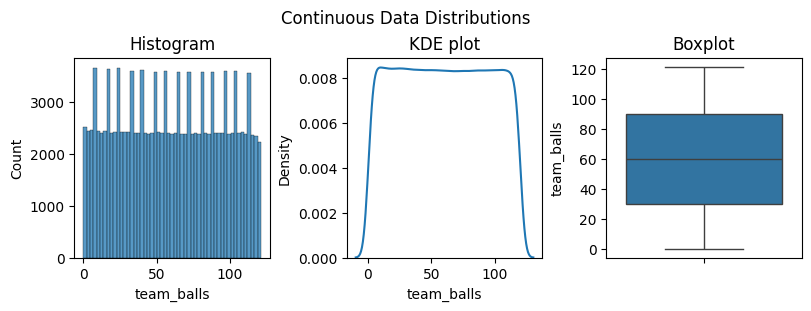

In [31]:
print("Non Visual Analysis")
cont_non_vis_analysis(df1,'team_balls')
print("Visual Analysis")
cont_vis_analysis(df1,'team_balls')

In [32]:
## Observations
# The team_balls feature follows an approximately uniform and platykurtic distribution—it is flat, symmetric, and not peaked

Non Visual Analysis
count     144131.00
min            0.00
max          287.00
mean          78.92
median        74.00
var         2647.50
std           51.45
skew           0.41
kurt          -0.56
Name: team_runs, dtype: float64

Visual Analysis


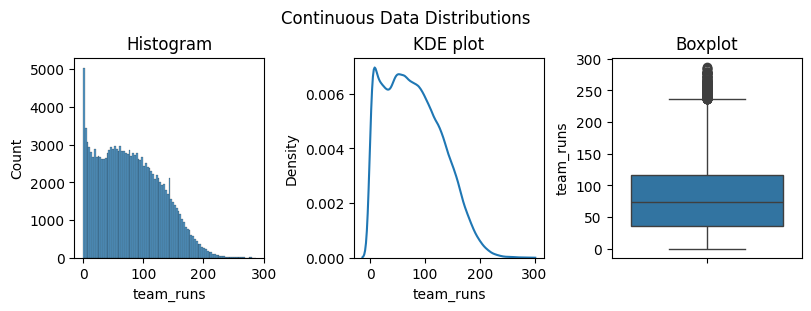

In [33]:
print("Non Visual Analysis")
cont_non_vis_analysis(df1,'team_runs')
print("Visual Analysis")
cont_vis_analysis(df1,'team_runs')

In [34]:
## Observations
# The distribution of team_runs remains strongly right-skewed, with the majority of values concentrated between 0 and 150, and a steady decline in frequency as scores increase toward 300.
# With several outliers above 225, showing that a few innings had exceptionally high cumulative scores by the end.
# The team_runs feature follows a platykurtic distribution.

In [35]:
def catg_disc_analysis(data, col):
    print("Value Counts for", col)
    print(data[col].value_counts())
    print("Null values =", data[col].isna().sum())

    # Widen the figure for more label room
    fig, axes = plt.subplots(1, 1, figsize=(12,10))
    fig.suptitle('Categorical / Discrete Num Data Distributions')

    # Plot
    sns.countplot(x=col, data=data, ax=axes)
    axes.set_title('Bar Plot')
    # Rotate x-axis labels and align them to the right
    axes.set_xticklabels(axes.get_xticklabels(), rotation=60, ha='right')

    plt.tight_layout()
    plt.show()



Value Counts for over
over
1     7358
0     7348
2     7262
3     7262
4     7260
5     7238
6     7222
7     7200
8     7197
9     7196
16    7193
15    7189
17    7184
14    7180
12    7175
18    7166
13    7163
10    7160
11    7160
19    7018
Name: count, dtype: int64
Null values = 0


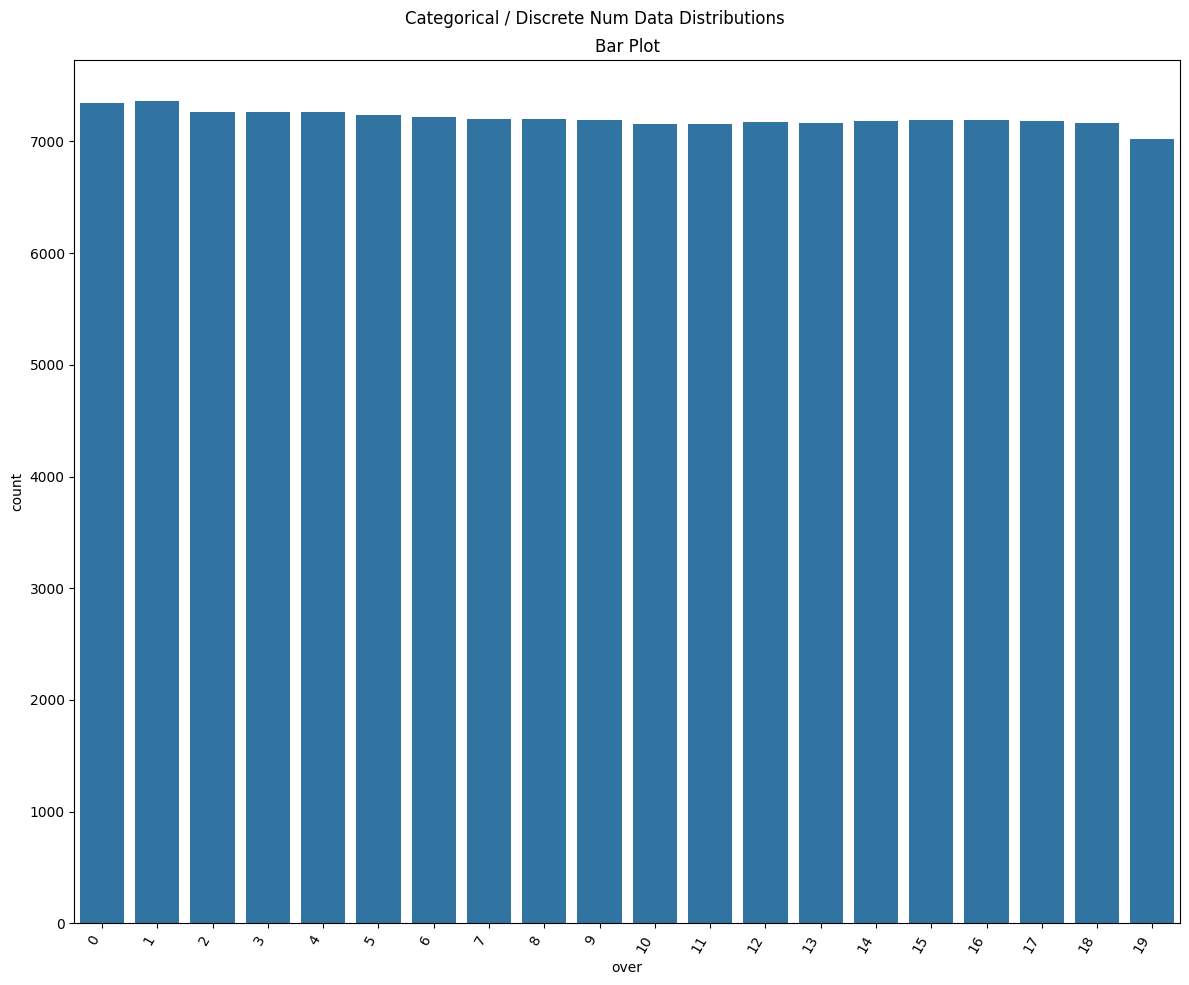

In [36]:
catg_disc_analysis(df1,'over')

Value Counts for ball
ball
1    24140
2    24025
5    24025
4    24000
3    23980
6    23960
7        1
Name: count, dtype: int64
Null values = 0


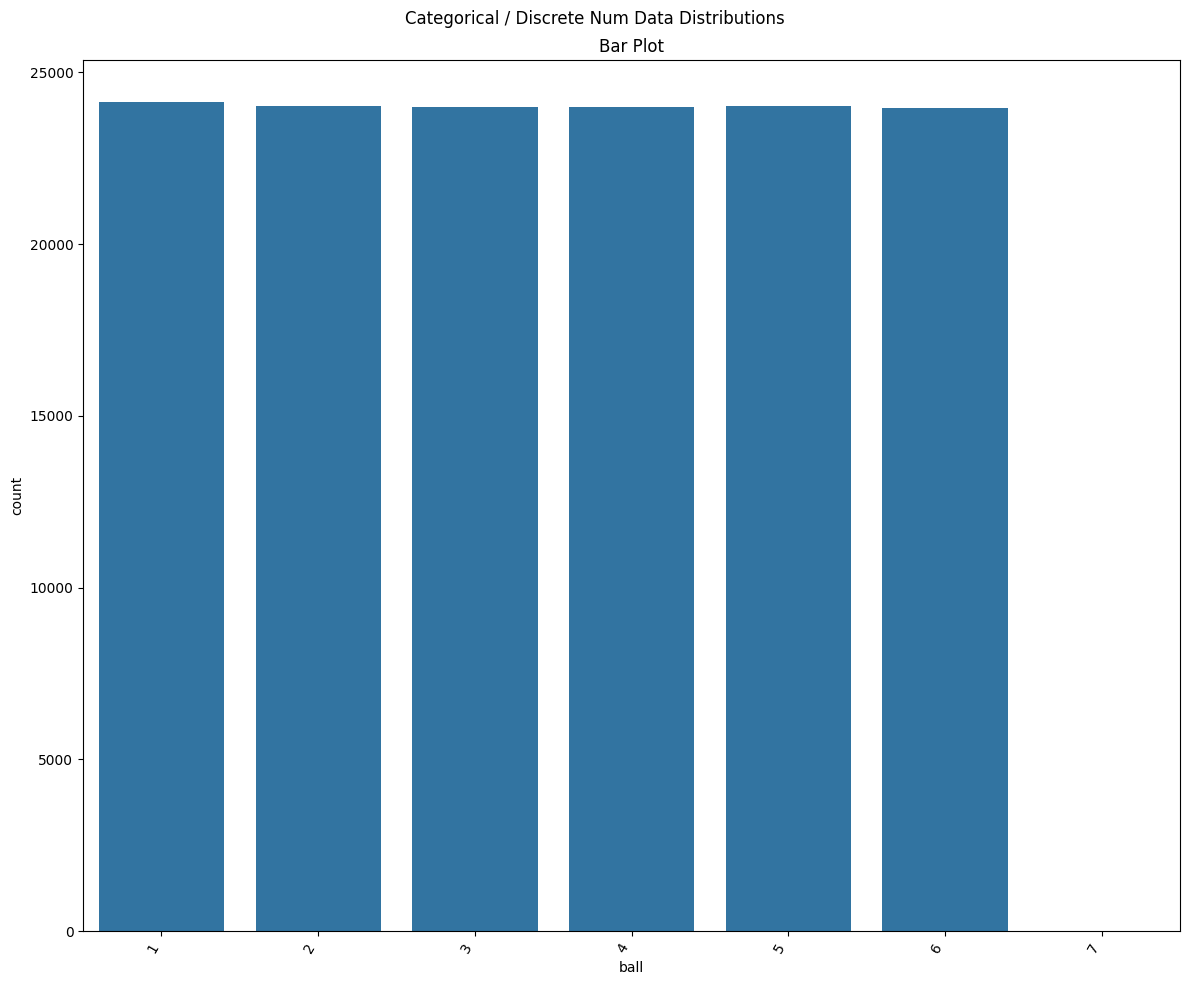

In [37]:
catg_disc_analysis(df1,'ball')

Value Counts for team_wicket
team_wicket
0     28511
1     28332
2     25650
3     21217
4     17316
5     10590
6      6412
7      3302
8      1792
9       929
10       80
Name: count, dtype: int64
Null values = 0


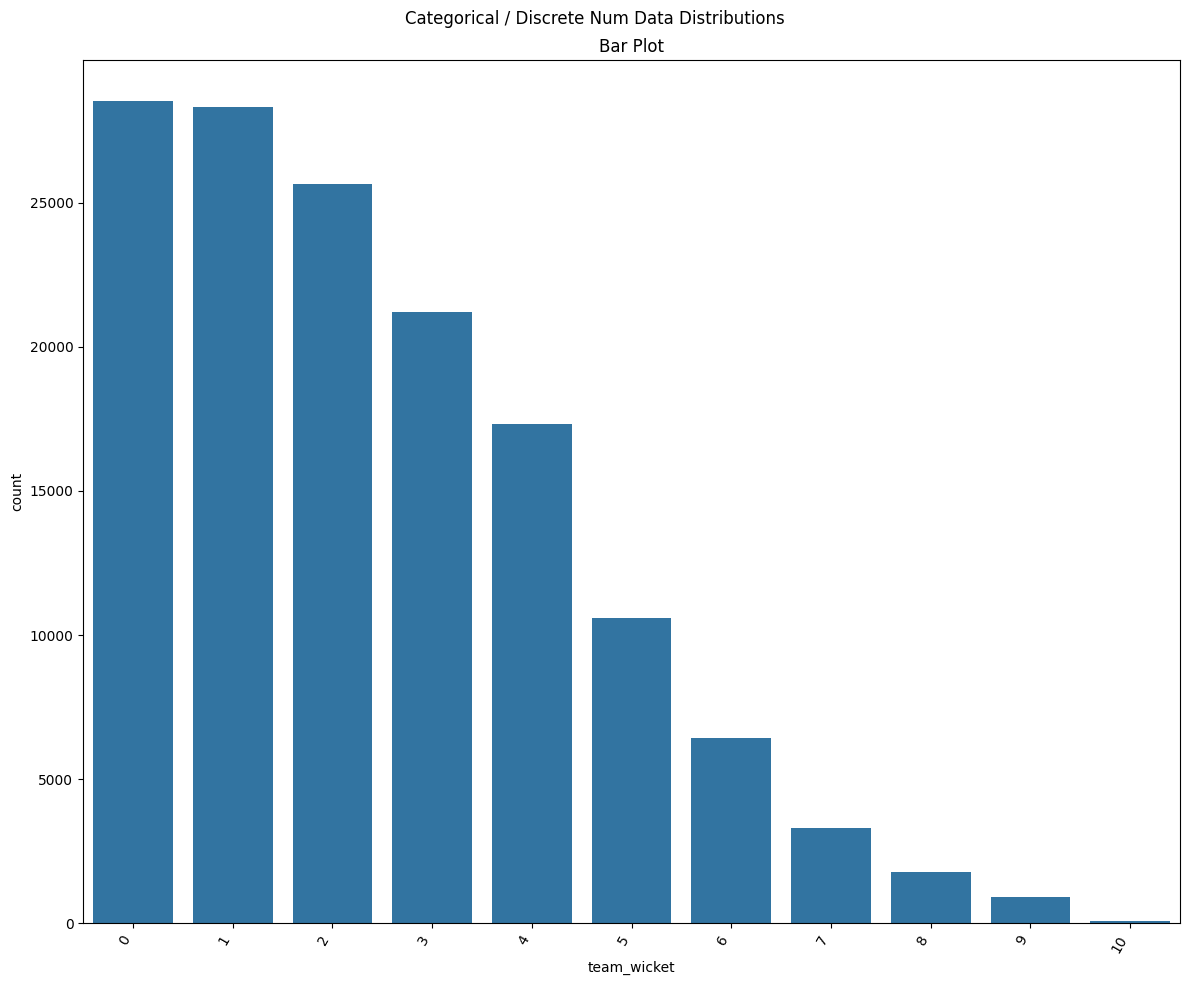

In [38]:
catg_disc_analysis(df1,'team_wicket')

Value Counts for runs_total
runs_total
1    60495
0    48830
4    16753
2     9708
6     7504
3      502
5      289
7       50
Name: count, dtype: int64
Null values = 0


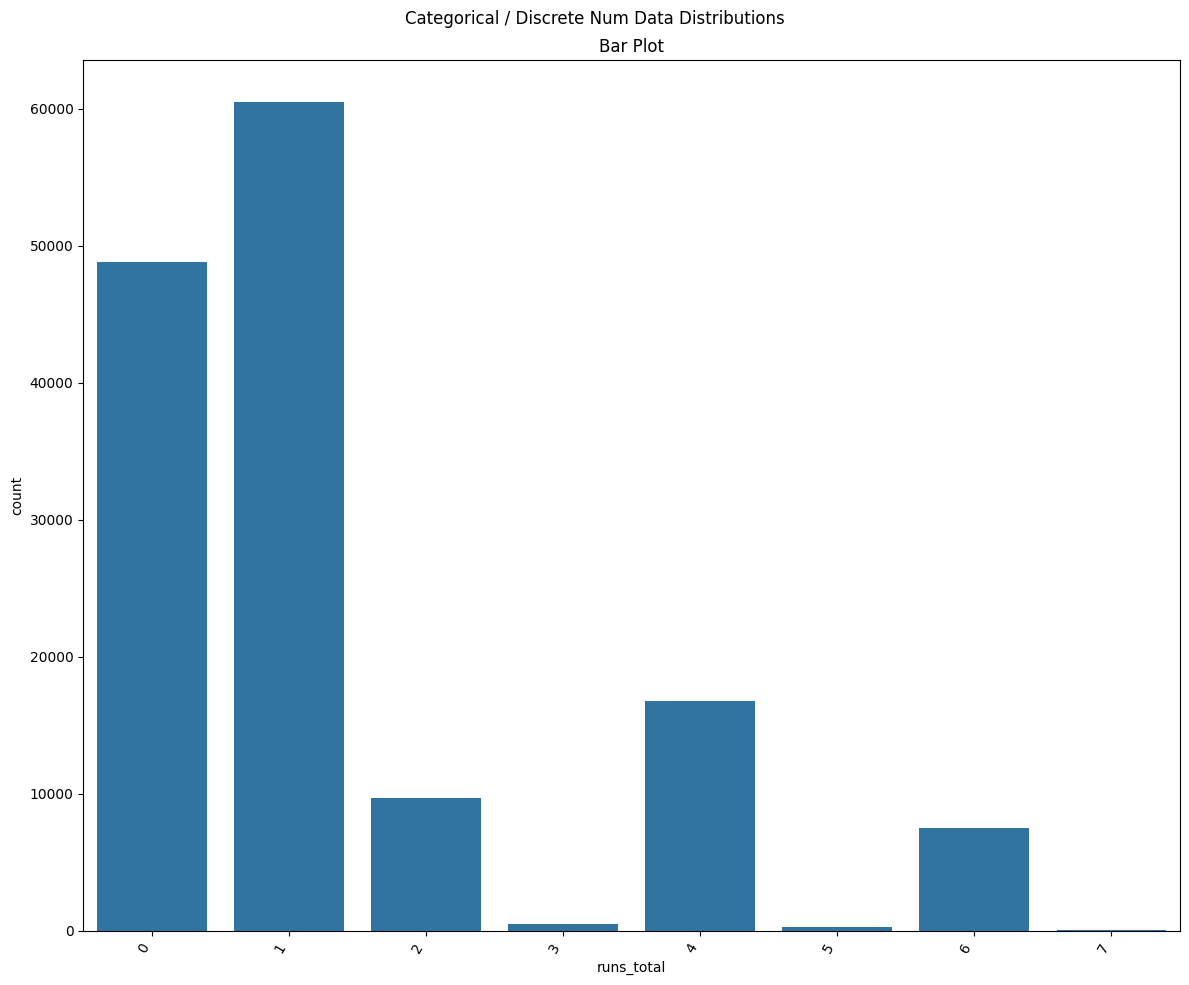

In [39]:
catg_disc_analysis(df1,'runs_total')

In [40]:
# Define a function to standardize team names using regex
def standardize_team_name(team):
    if re.search('Delhi Daredevils|Delhi Capitals', team, re.IGNORECASE):
        return 'Delhi Capitals'
    elif re.search('Kings XI Punjab|Punjab Kings', team, re.IGNORECASE):
        return 'Punjab Kings'
    elif re.search('Rising Pune Supergiant|Rising Pune Supergiants', team, re.IGNORECASE):
        return 'Rising Pune Supergiants'
    elif re.search('Deccan Chargers|Sunrisers Hyderabad', team, re.IGNORECASE):
        return 'Sunrisers Hyderabad'
    elif re.search('Royal Challengers Bangalore|Royal Challengers Bengaluru', team, re.IGNORECASE):
        return 'Royal Challengers Bangalore'
    else:
        return team

In [41]:

"""
Apply the standardize_team_name function to the 'batting_team' column
to standardize the team names in this column.
"""
df1['batting_team'] = df1['batting_team'].apply(standardize_team_name)

Value Counts for batting_team
batting_team
Sunrisers Hyderabad            17932
Mumbai Indians                 17794
Punjab Kings                   16999
Royal Challengers Bangalore    16867
Chennai Super Kings            16840
Kolkata Knight Riders          15449
Delhi Capitals                 14608
Rajasthan Royals               13228
Lucknow Super Giants            4138
Gujarat Titans                  3383
Pune Warriors                   2448
Rising Pune Supergiants         1843
Gujarat Lions                   1726
Kochi Tuskers Kerala             876
Name: count, dtype: int64
Null values = 0


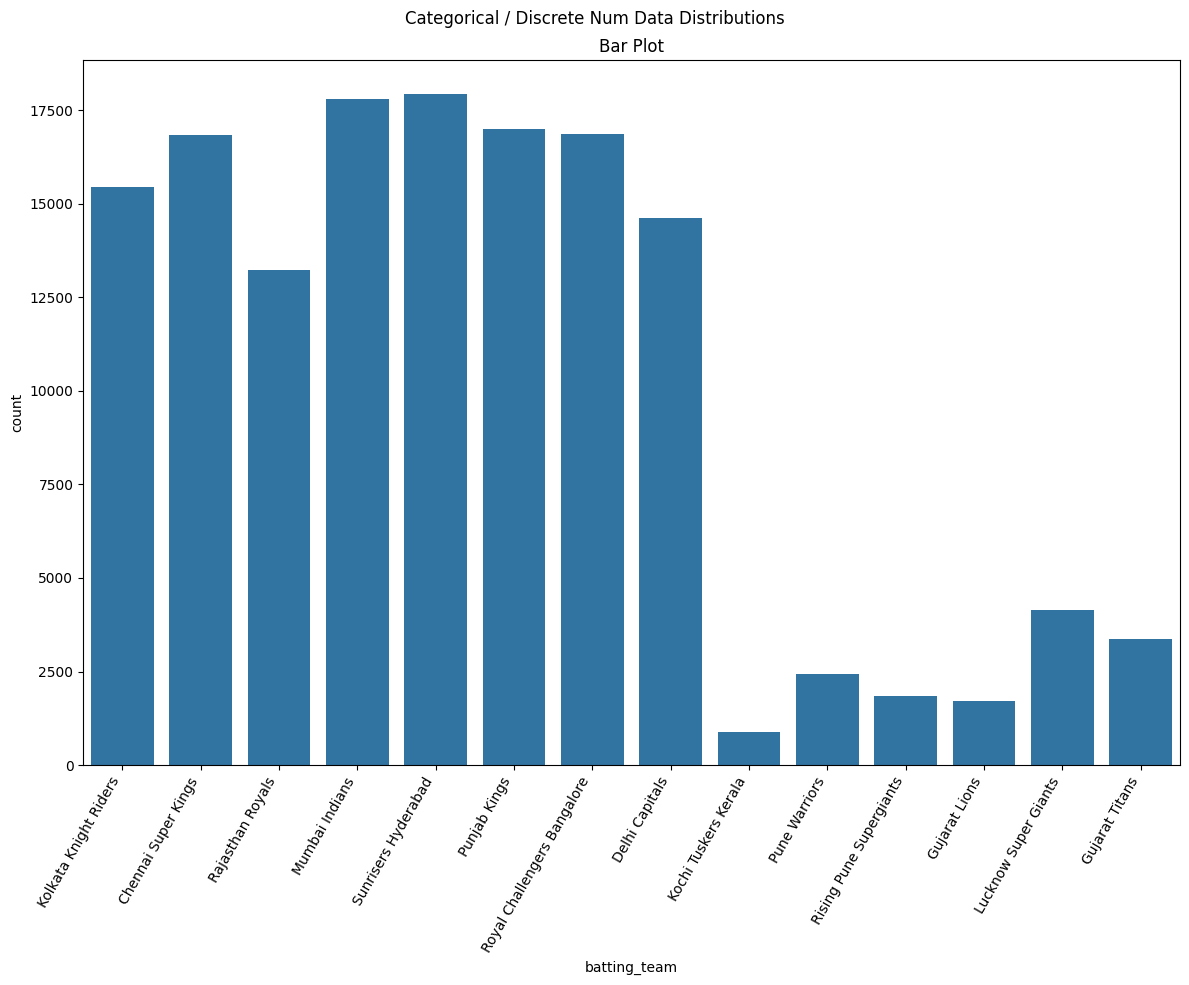

In [42]:
catg_disc_analysis(df1,'batting_team')

In [43]:
"""
Apply the standardize_team_name function to the 'bowling_team' column
to standardize the team names in this column.
"""
df1['bowling_team'] = df1['bowling_team'].apply(standardize_team_name)

Value Counts for bowling_team
bowling_team
Delhi Capitals                 18226
Kolkata Knight Riders          16992
Mumbai Indians                 16612
Royal Challengers Bangalore    16096
Rajasthan Royals               15846
Sunrisers Hyderabad            15620
Punjab Kings                   15401
Chennai Super Kings            14344
Gujarat Titans                  4082
Pune Warriors                   3146
Lucknow Super Giants            3122
Gujarat Lions                   1970
Rising Pune Supergiants         1834
Kochi Tuskers Kerala             840
Name: count, dtype: int64
Null values = 0


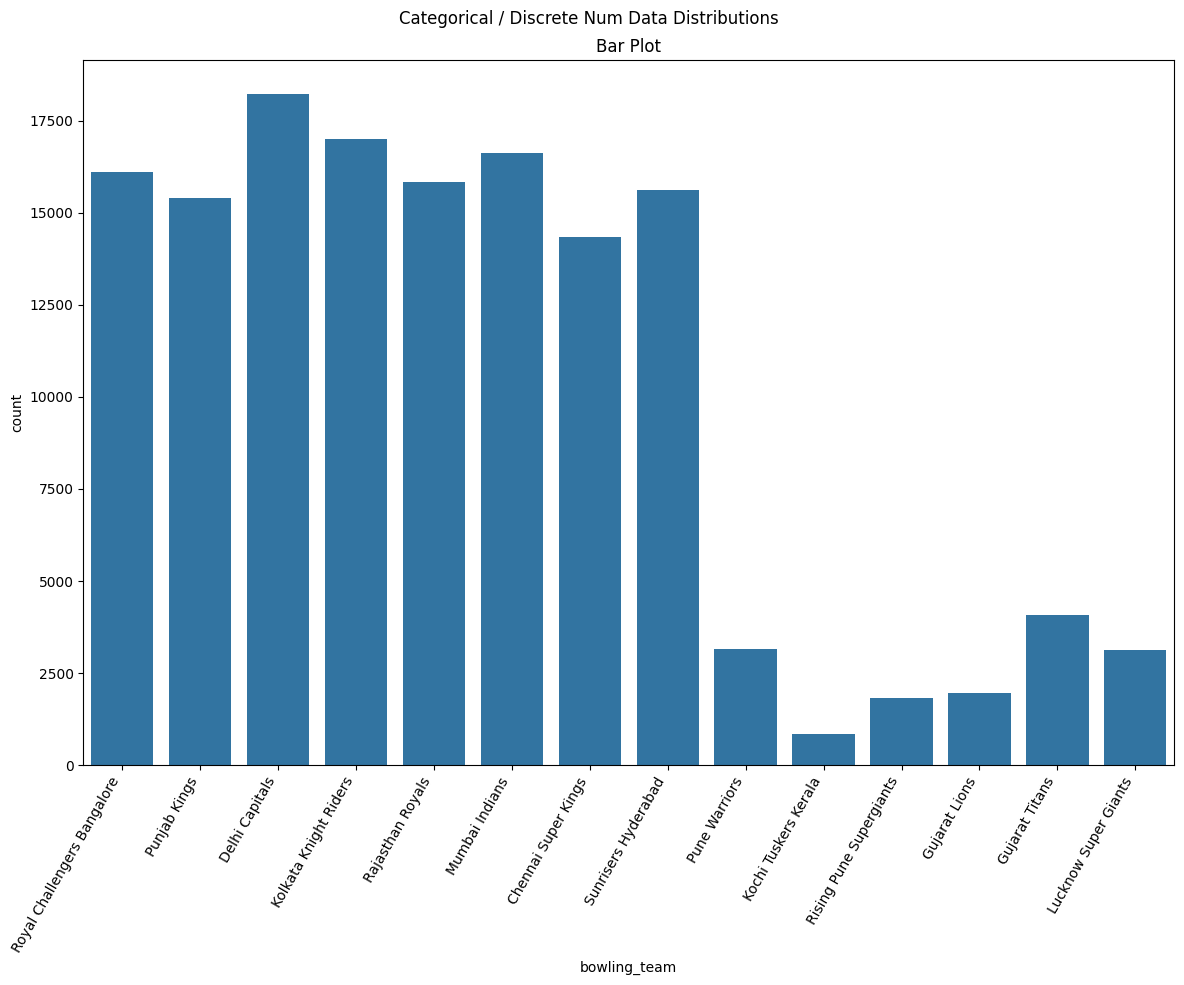

In [44]:
catg_disc_analysis(df1,'bowling_team')

In [45]:
"""
Apply the standardize_team_name function to the 'toss_winner' column
to standardize the team names in this column.
"""
df1['toss_winner'] = df1['toss_winner'].apply(standardize_team_name)

Value Counts for toss_winner
toss_winner
Mumbai Indians                 18729
Sunrisers Hyderabad            17047
Delhi Capitals                 16881
Kolkata Knight Riders          15834
Chennai Super Kings            15765
Royal Challengers Bangalore    15712
Rajasthan Royals               15688
Punjab Kings                   15010
Gujarat Titans                  3613
Lucknow Super Giants            3008
Pune Warriors                   2454
Gujarat Lions                   1857
Rising Pune Supergiants         1564
Kochi Tuskers Kerala             969
Name: count, dtype: int64
Null values = 0


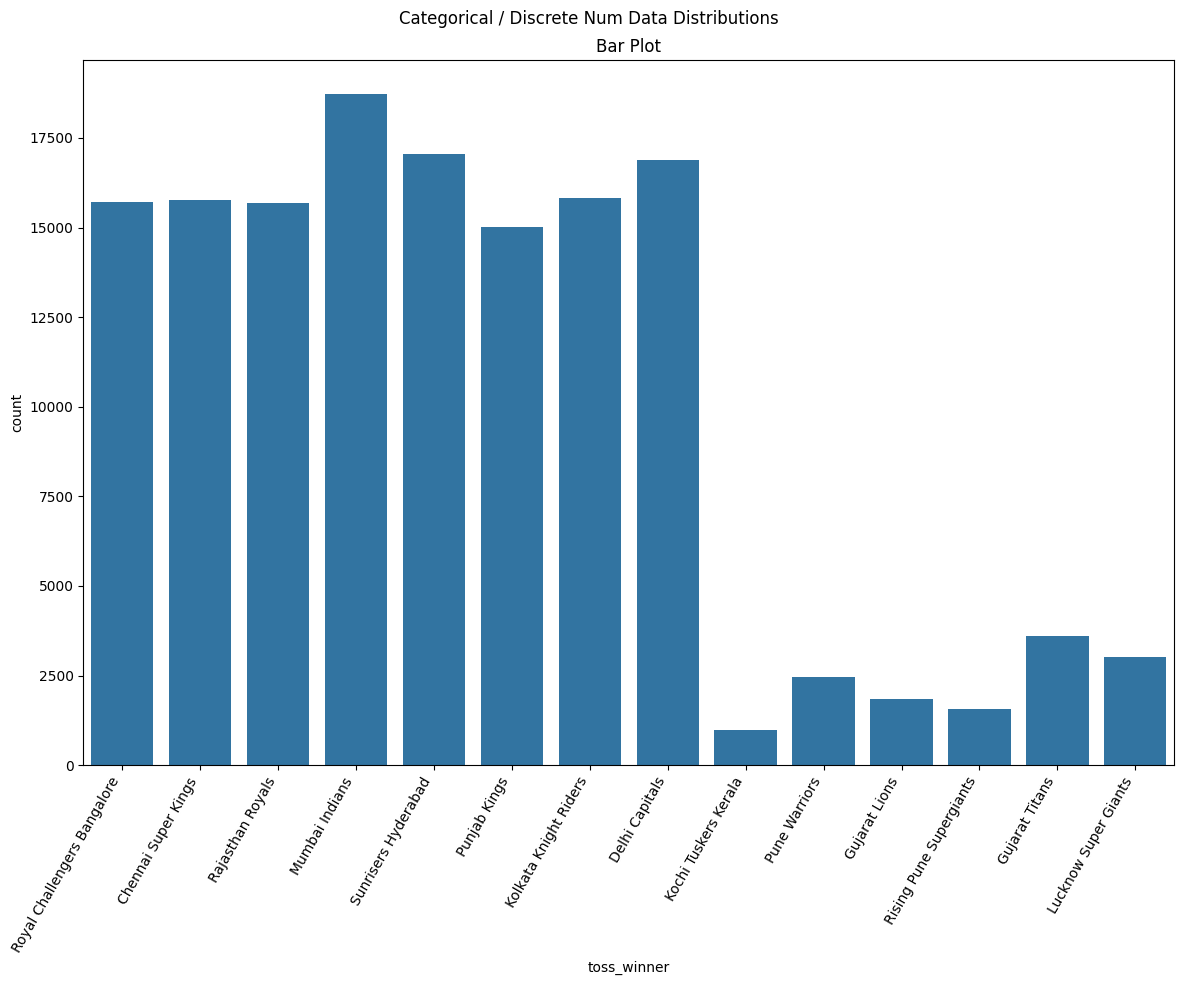

In [46]:
catg_disc_analysis(df1,'toss_winner')

In [47]:
# Define a function to standardize names using regex
def standardize_venue_name(venue):
    """
    Checks for keywords in a venue string and returns a standardized, current name.
    It handles old names (like Feroz Shah Kotla) and variations.
    """
    # Using re.search with re.IGNORECASE for robust, case-insensitive matching
    if re.search('Wankhede', venue, re.IGNORECASE):
        return 'Wankhede Stadium,Mumbai'
    elif re.search('Eden Gardens', venue, re.IGNORECASE):
        return 'Eden Gardens,Kolkata'
    elif re.search('Chinnaswamy', venue, re.IGNORECASE):
        return 'Chinnaswamy Stadium,Bengaluru'
    elif re.search('Arun Jaitley|Feroz Shah Kotla', venue, re.IGNORECASE):
        return 'Arun Jaitley Stadium,Delhi'
    elif re.search('MA Chidambaram|Chepauk', venue, re.IGNORECASE):
        return 'MA Chidambaram Stadium,Chennai'
    elif re.search('Rajiv Gandhi.*Uppal|Rajiv Gandhi International Stadium', venue, re.IGNORECASE):
        return 'Rajiv Gandhi Stadium,Hyderabad'
    elif re.search('Sawai Mansingh', venue, re.IGNORECASE):
        return 'Sawai Mansingh Stadium,Jaipur'
    elif re.search('Punjab Cricket Association|Bindra Stadium', venue, re.IGNORECASE):
        return 'PCA IS Bindra Stadium,Mohali'
    elif re.search('Subrata Roy Sahara|Maharashtra Cricket Association', venue, re.IGNORECASE):
        return 'MCA Stadium,Pune'
    elif re.search('Sardar Patel|Narendra Modi', venue, re.IGNORECASE):
        return 'Narendra Modi Stadium,Ahmedabad'
    elif re.search('DY Patil', venue, re.IGNORECASE):
        return 'DY Patil Stadium,Navi Mumbai'
    elif re.search('Brabourne', venue, re.IGNORECASE):
        return 'Brabourne Stadium,Mumbai'
    elif re.search('Y\.S\. Rajasekhara Reddy', venue, re.IGNORECASE):
        return 'ACA-VDCA Cricket Stadium,Visakhapatnam'
    elif re.search('Himachal Pradesh', venue, re.IGNORECASE):
        return 'HCA Stadium,Dharamsala'
    elif re.search('Sheikh Zayed|Zayed Cricket', venue, re.IGNORECASE):
        return 'Sheikh Zayed Stadium,Abu Dhabi'
    elif re.search('Maharaja Yadavindra', venue, re.IGNORECASE):
        return 'Maharaja Yadavindra Singh Stadium, Mullanpur'
    else:
        # If no keywords are matched, return the original venue name
        return venue

In [48]:
# The .apply() method passes each venue name from the column into our function.
df1['venue'] = df1['venue'].apply(standardize_venue_name)

Value Counts for venue
venue
Wankhede Stadium,Mumbai                                                  15545
Eden Gardens,Kolkata                                                     12251
Chinnaswamy Stadium,Bengaluru                                            11979
Arun Jaitley Stadium,Delhi                                               11950
MA Chidambaram Stadium,Chennai                                           11305
Rajiv Gandhi Stadium,Hyderabad                                           10255
Sawai Mansingh Stadium,Jaipur                                             7954
PCA IS Bindra Stadium,Mohali                                              7449
MCA Stadium,Pune                                                          6300
Dubai International Cricket Stadium                                       5729
Narendra Modi Stadium,Ahmedabad                                           5600
DY Patil Stadium,Navi Mumbai                                              4591
Sheikh Zayed Stadium,Ab

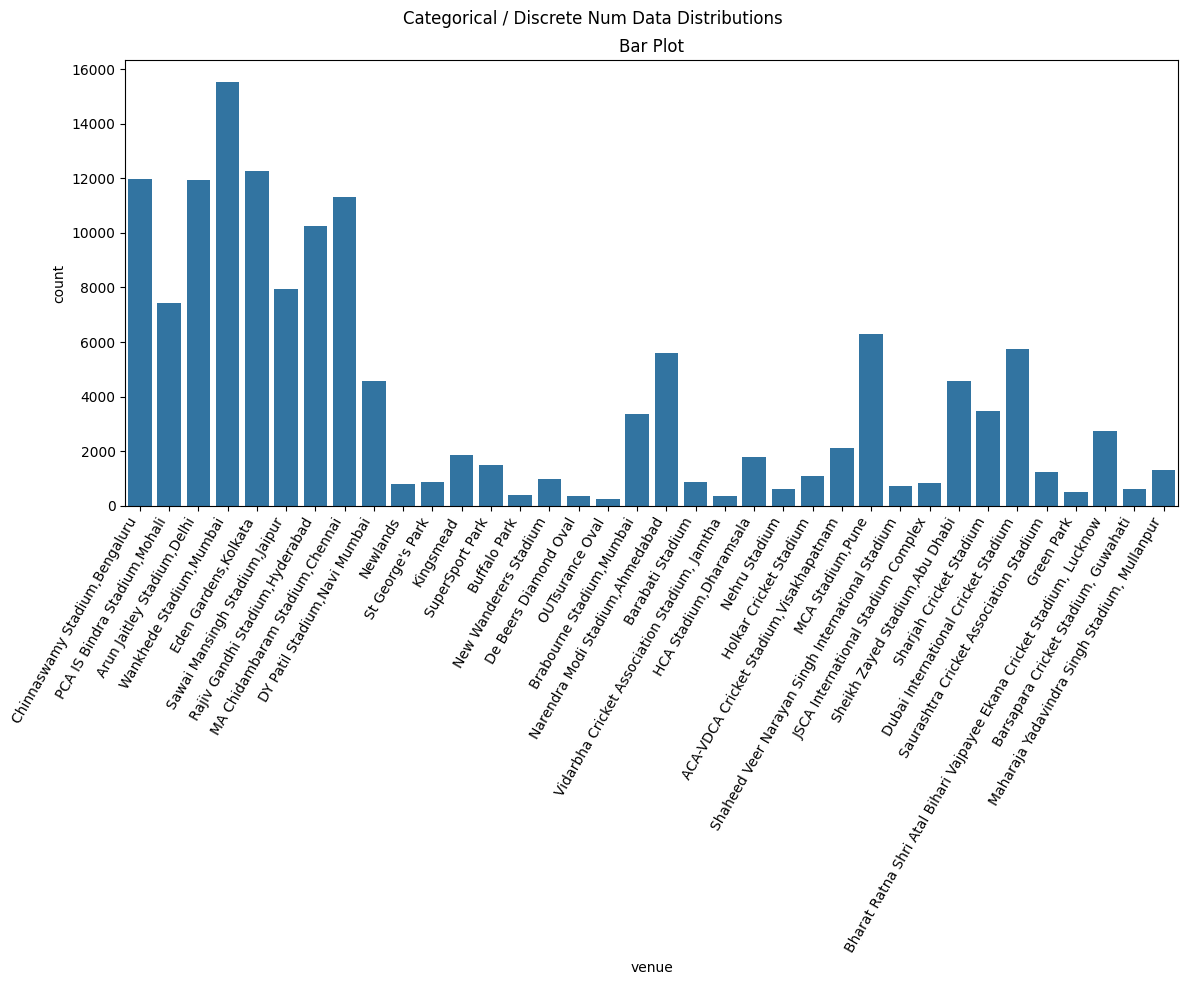

In [49]:
catg_disc_analysis(df1,'venue')

### Bivariate Analysis

In [50]:
df1.columns

Index(['match_id', 'innings', 'batting_team', 'bowling_team', 'over', 'ball',
       'runs_total', 'toss_winner', 'team_runs', 'team_balls', 'team_wicket',
       'venue'],
      dtype='object')

In [51]:
## Cont-Cont
def cont_cont_bivar_analysis(data,col1,col2):
  print(f"Covariance = {data[col1].cov(data[col2])}")
  print(f"Correlation = {data[col1].corr(data[col2])}")
  sns.scatterplot(x=col1,y=col2,data=data)
  plt.show()

Covariance = 1658.2424553588812
Correlation = 0.9297851618125412


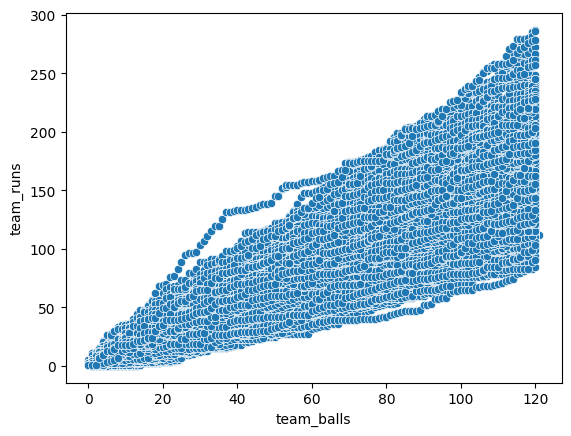

In [52]:
cont_cont_bivar_analysis(df1,'team_balls','team_runs')

In [53]:
# cont - cat bivariate
def cont_cat_bivar_analysis(data,cat_col,num_col):
  plt.figure(figsize=(12, 8))
  sns.boxplot(x=cat_col,y=num_col,data=data)
  plt.xticks(rotation=45, ha='right') # Rotate x-axis labels
  plt.tight_layout()
  plt.show()

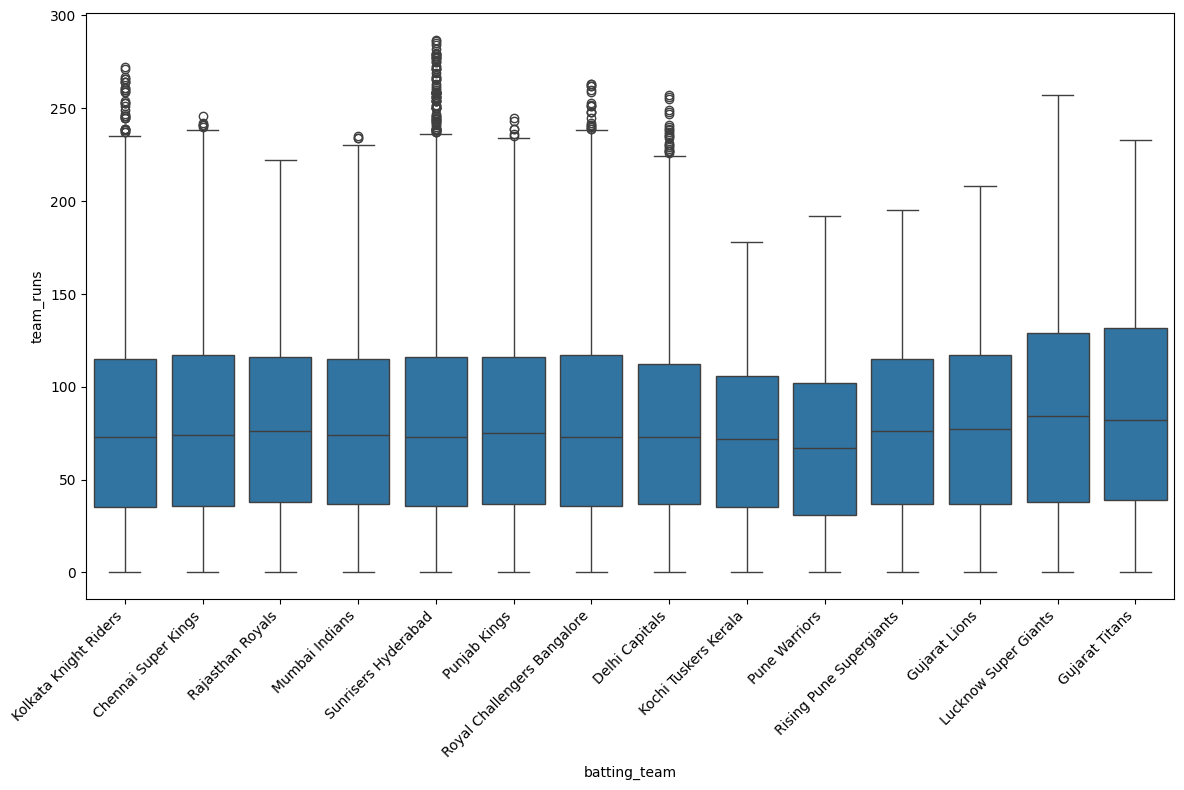

In [54]:
cont_cat_bivar_analysis(df1,'batting_team','team_runs')

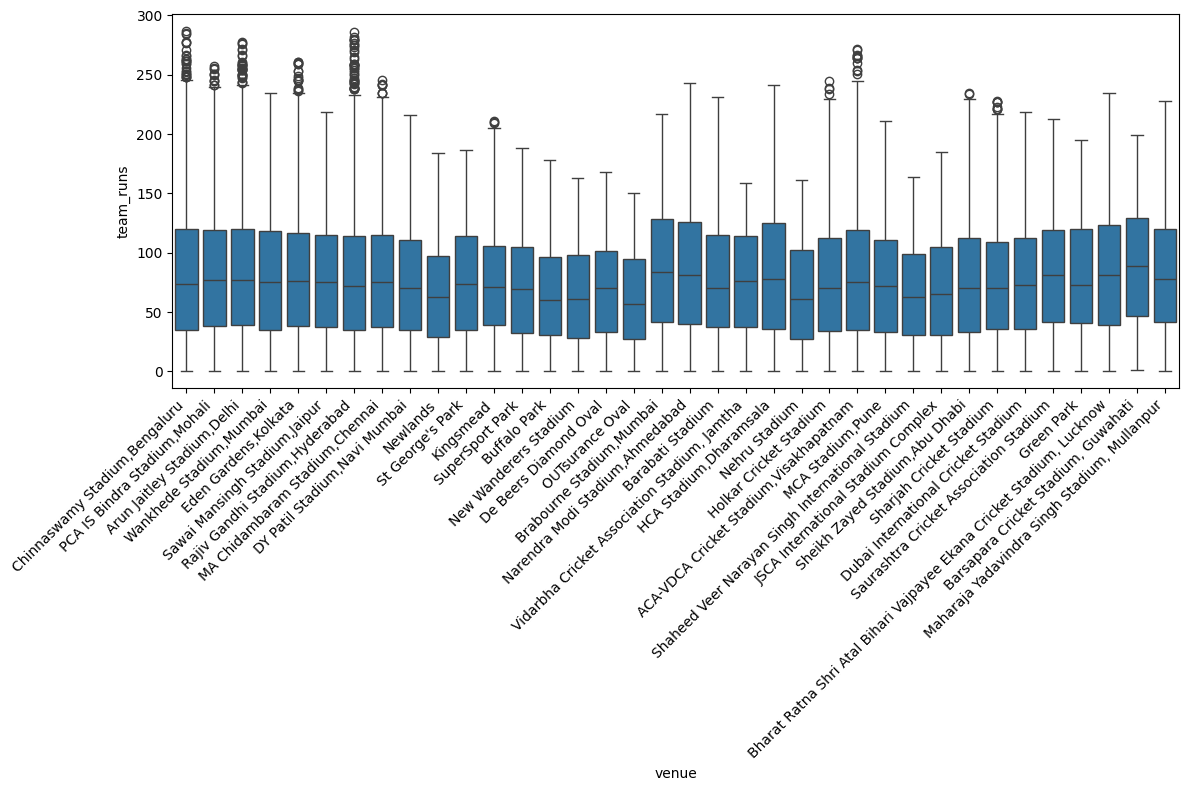

In [55]:
cont_cat_bivar_analysis(df1,'venue','team_runs')

In [56]:
# Categorical vs Categorical Bivariate Analysis using Heatmap
def cat_cat_heatmap_analysis(data, cat_col1, cat_col2):
    # Create a contingency table
    contingency_table = pd.crosstab(data[cat_col1], data[cat_col2])

    plt.figure(figsize=(12, 8))
    sns.heatmap(contingency_table, annot=True, fmt='d', cmap='viridis')
    plt.title(f'Heatmap of {cat_col1} vs {cat_col2}')
    plt.xlabel(cat_col2)
    plt.ylabel(cat_col1)
    plt.tight_layout()
    plt.show()


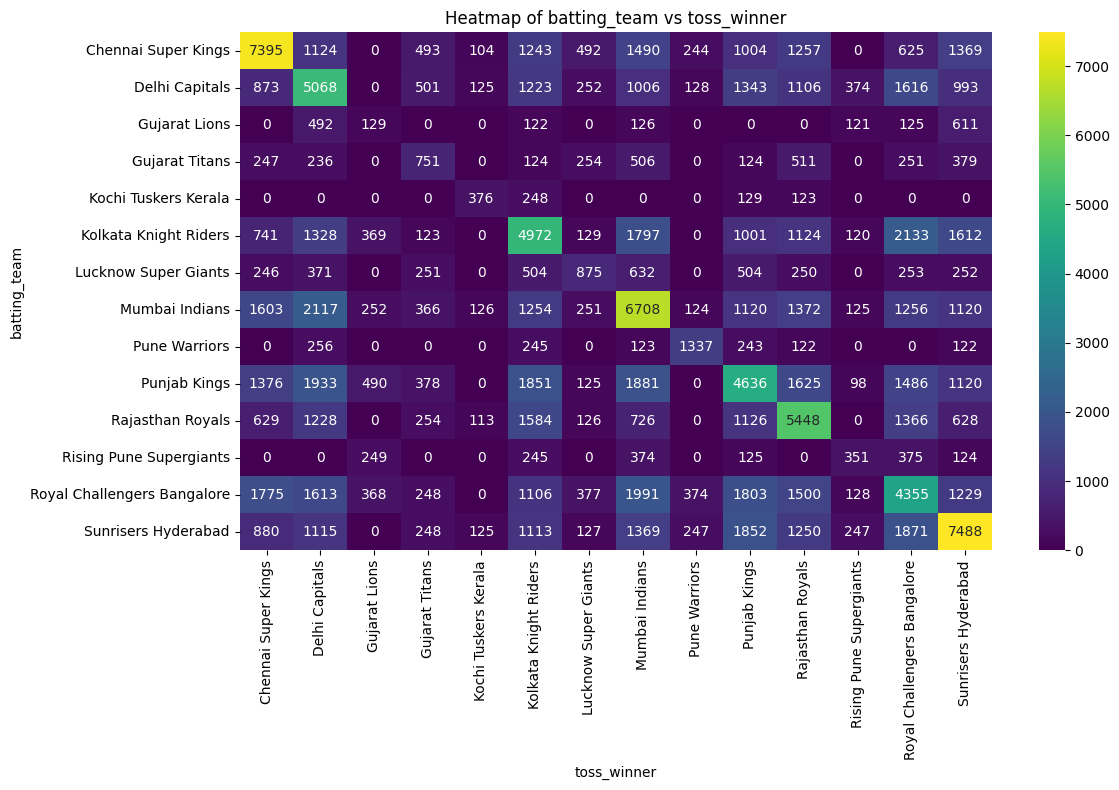

In [57]:
# Visualize the relationship between 'batting_team' and 'toss_winner'
cat_cat_heatmap_analysis(df1, 'batting_team', 'toss_winner')

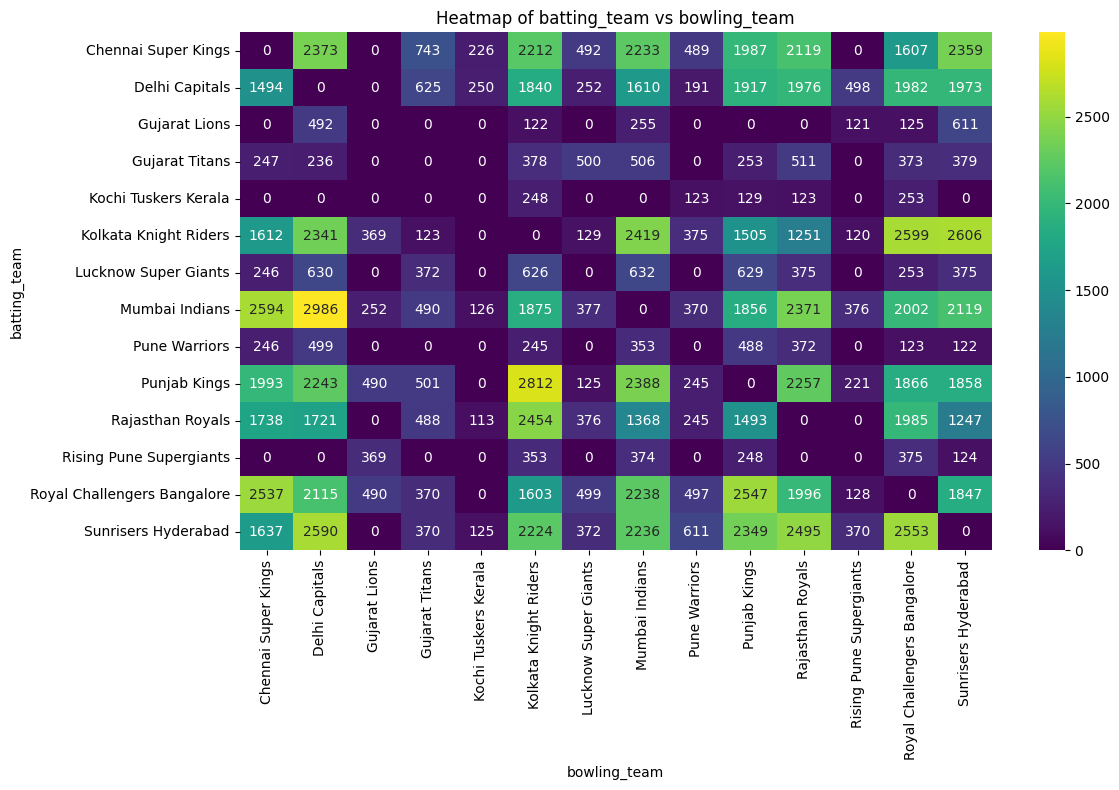

In [58]:
cat_cat_heatmap_analysis(df1, 'batting_team', 'bowling_team')

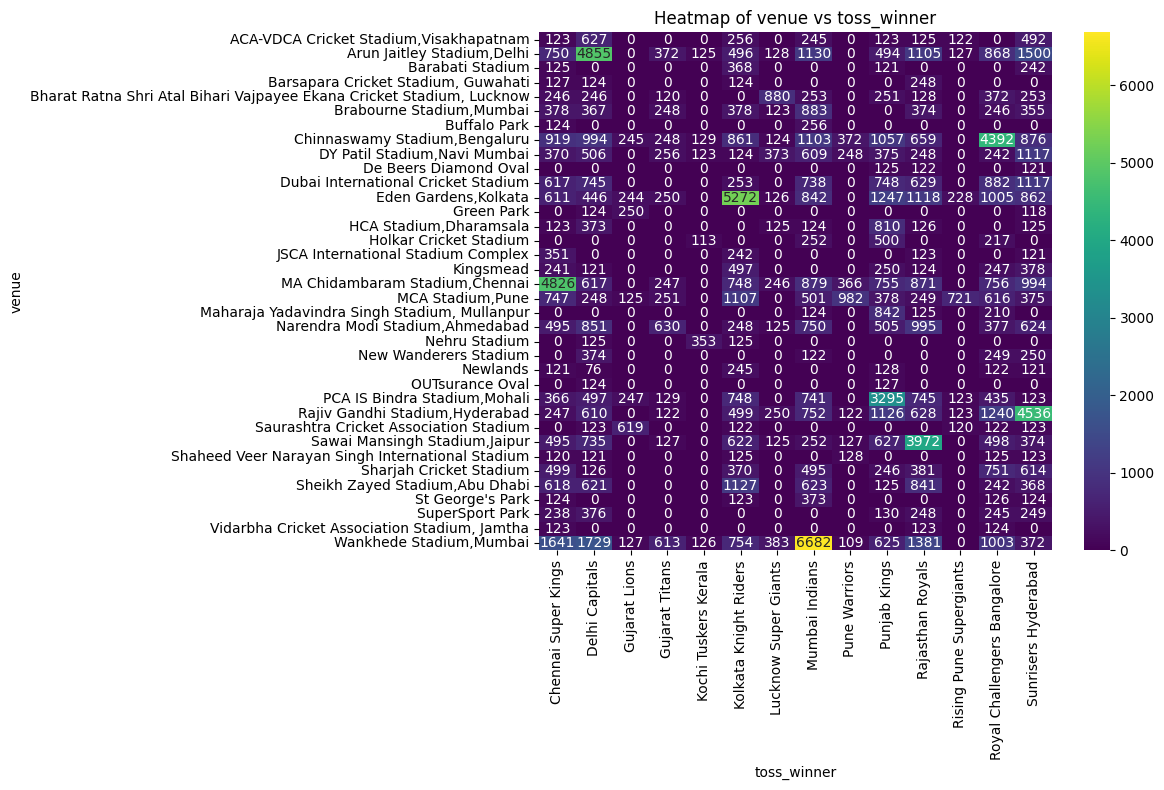

In [59]:
cat_cat_heatmap_analysis(df1, 'venue', 'toss_winner')

In [60]:
import pickle

# Save the processed DataFrame to a pickle file
pickle.dump(df1, open('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project - 5 (IPL_Score_Prediction)/Dataset/df1_EDA.pkl', 'wb'))

In [61]:
import pickle

# Load the processed DataFrame from the pickle file
df1 = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project - 5 (IPL_Score_Prediction)/Dataset/df1_EDA.pkl', 'rb'))

## Data Preprocessing

In [62]:
df1.head()

,match_id,innings,batting_team,bowling_team,over,ball,runs_total,toss_winner,team_runs,team_balls,team_wicket,venue
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,1,Royal Challengers Bangalore,1,1,0,"Chinnaswamy Stadium,Bengaluru"
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,0,Royal Challengers Bangalore,1,2,0,"Chinnaswamy Stadium,Bengaluru"
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,1,Royal Challengers Bangalore,2,2,0,"Chinnaswamy Stadium,Bengaluru"
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,0,Royal Challengers Bangalore,2,3,0,"Chinnaswamy Stadium,Bengaluru"
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,0,Royal Challengers Bangalore,2,4,0,"Chinnaswamy Stadium,Bengaluru"


In [63]:
df1['ball'].value_counts()

,count
ball,
1,24140
2,24025
5,24025
4,24000
3,23980
6,23960
7,1


In [64]:
df1['runs_total'].value_counts()

,count
runs_total,
1,60495
0,48830
4,16753
2,9708
6,7504
3,502
5,289
7,50


In [65]:
# In cricket, each over has only 6 legal balls (1 to 6). A value of 7 is invalid or likely an error in the data.
df1 = df1[df1['ball'] != 7]

In [66]:
# Drop the 'innings' column as it only contains the value 1 after filtering
df1 = df1.drop('innings', axis=1)

In [67]:
df1['ball'].value_counts()

,count
ball,
1,24140
2,24025
5,24025
4,24000
3,23980
6,23960


In [68]:
df1.isna().sum()

,0
match_id,0
batting_team,0
bowling_team,0
over,0
ball,0
runs_total,0
toss_winner,0
team_runs,0
team_balls,0
team_wicket,0


### Featuring engineering

In [69]:
df1['balls_left'] = 120 - df1['team_balls']
df1

,match_id,batting_team,bowling_team,over,ball,runs_total,toss_winner,team_runs,team_balls,team_wicket,venue,balls_left
0,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,1,Royal Challengers Bangalore,1,1,0,"Chinnaswamy Stadium,Bengaluru",119
1,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,0,Royal Challengers Bangalore,1,2,0,"Chinnaswamy Stadium,Bengaluru",118
2,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,1,Royal Challengers Bangalore,2,2,0,"Chinnaswamy Stadium,Bengaluru",118
3,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,0,Royal Challengers Bangalore,2,3,0,"Chinnaswamy Stadium,Bengaluru",117
4,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,0,Royal Challengers Bangalore,2,4,0,"Chinnaswamy Stadium,Bengaluru",116
...,...,...,...,...,...,...,...,...,...,...,...,...
144126,1473511,Royal Challengers Bangalore,Punjab Kings,19,2,0,Punjab Kings,188,116,7,"Narendra Modi Stadium,Ahmedabad",4
144127,1473511,Royal Challengers Bangalore,Punjab Kings,19,3,1,Punjab Kings,189,117,7,"Narendra Modi Stadium,Ahmedabad",3
144128,1473511,Royal Challengers Bangalore,Punjab Kings,19,4,0,Punjab Kings,189,118,8,"Narendra Modi Stadium,Ahmedabad",2
144129,1473511,Royal Challengers Bangalore,Punjab Kings,19,5,1,Punjab Kings,190,119,8,"Narendra Modi Stadium,Ahmedabad",1


In [70]:
# create wickets_left column
df1['wickets_left'] = 10 - df1['team_wicket']
df1

,match_id,batting_team,bowling_team,over,ball,runs_total,toss_winner,team_runs,team_balls,team_wicket,venue,balls_left,wickets_left
0,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,1,Royal Challengers Bangalore,1,1,0,"Chinnaswamy Stadium,Bengaluru",119,10
1,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,0,Royal Challengers Bangalore,1,2,0,"Chinnaswamy Stadium,Bengaluru",118,10
2,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,1,Royal Challengers Bangalore,2,2,0,"Chinnaswamy Stadium,Bengaluru",118,10
3,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,0,Royal Challengers Bangalore,2,3,0,"Chinnaswamy Stadium,Bengaluru",117,10
4,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,0,Royal Challengers Bangalore,2,4,0,"Chinnaswamy Stadium,Bengaluru",116,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144126,1473511,Royal Challengers Bangalore,Punjab Kings,19,2,0,Punjab Kings,188,116,7,"Narendra Modi Stadium,Ahmedabad",4,3
144127,1473511,Royal Challengers Bangalore,Punjab Kings,19,3,1,Punjab Kings,189,117,7,"Narendra Modi Stadium,Ahmedabad",3,3
144128,1473511,Royal Challengers Bangalore,Punjab Kings,19,4,0,Punjab Kings,189,118,8,"Narendra Modi Stadium,Ahmedabad",2,2
144129,1473511,Royal Challengers Bangalore,Punjab Kings,19,5,1,Punjab Kings,190,119,8,"Narendra Modi Stadium,Ahmedabad",1,2


In [71]:
# create current run rate column
df1['current_run_rate'] = (df1['team_runs'] * 6) / df1['team_balls']
df1

,match_id,batting_team,bowling_team,over,ball,runs_total,toss_winner,team_runs,team_balls,team_wicket,venue,balls_left,wickets_left,current_run_rate
0,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,1,Royal Challengers Bangalore,1,1,0,"Chinnaswamy Stadium,Bengaluru",119,10,6.000000
1,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,0,Royal Challengers Bangalore,1,2,0,"Chinnaswamy Stadium,Bengaluru",118,10,3.000000
2,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,1,Royal Challengers Bangalore,2,2,0,"Chinnaswamy Stadium,Bengaluru",118,10,6.000000
3,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,0,Royal Challengers Bangalore,2,3,0,"Chinnaswamy Stadium,Bengaluru",117,10,4.000000
4,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,0,Royal Challengers Bangalore,2,4,0,"Chinnaswamy Stadium,Bengaluru",116,10,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144126,1473511,Royal Challengers Bangalore,Punjab Kings,19,2,0,Punjab Kings,188,116,7,"Narendra Modi Stadium,Ahmedabad",4,3,9.724138
144127,1473511,Royal Challengers Bangalore,Punjab Kings,19,3,1,Punjab Kings,189,117,7,"Narendra Modi Stadium,Ahmedabad",3,3,9.692308
144128,1473511,Royal Challengers Bangalore,Punjab Kings,19,4,0,Punjab Kings,189,118,8,"Narendra Modi Stadium,Ahmedabad",2,2,9.610169
144129,1473511,Royal Challengers Bangalore,Punjab Kings,19,5,1,Punjab Kings,190,119,8,"Narendra Modi Stadium,Ahmedabad",1,2,9.579832


In [72]:
# rename column name 'runs_total' to 'ball_runs'
df1 = df1.rename(columns={'runs_total': 'ball_runs'})

In [73]:
df1.head()

,match_id,batting_team,bowling_team,over,ball,ball_runs,toss_winner,team_runs,team_balls,team_wicket,venue,balls_left,wickets_left,current_run_rate
0,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,1,Royal Challengers Bangalore,1,1,0,"Chinnaswamy Stadium,Bengaluru",119,10,6.0
1,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,0,Royal Challengers Bangalore,1,2,0,"Chinnaswamy Stadium,Bengaluru",118,10,3.0
2,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,1,Royal Challengers Bangalore,2,2,0,"Chinnaswamy Stadium,Bengaluru",118,10,6.0
3,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,0,Royal Challengers Bangalore,2,3,0,"Chinnaswamy Stadium,Bengaluru",117,10,4.0
4,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,0,Royal Challengers Bangalore,2,4,0,"Chinnaswamy Stadium,Bengaluru",116,10,3.0


In [74]:
groups = df1.groupby('match_id')
match_ids = df1['match_id'].unique()
last_five = []
for id in match_ids:
    last_five.extend(
        groups.get_group(id)['ball_runs'].rolling(window=30).sum().values.tolist()
    )

In [75]:
df1['last_five']= last_five

In [76]:
df1

,match_id,batting_team,bowling_team,over,ball,ball_runs,toss_winner,team_runs,team_balls,team_wicket,venue,balls_left,wickets_left,current_run_rate,last_five
0,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,1,Royal Challengers Bangalore,1,1,0,"Chinnaswamy Stadium,Bengaluru",119,10,6.000000,NaN
1,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,0,Royal Challengers Bangalore,1,2,0,"Chinnaswamy Stadium,Bengaluru",118,10,3.000000,NaN
2,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,1,Royal Challengers Bangalore,2,2,0,"Chinnaswamy Stadium,Bengaluru",118,10,6.000000,NaN
3,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,0,Royal Challengers Bangalore,2,3,0,"Chinnaswamy Stadium,Bengaluru",117,10,4.000000,NaN
4,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,0,Royal Challengers Bangalore,2,4,0,"Chinnaswamy Stadium,Bengaluru",116,10,3.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144126,1473511,Royal Challengers Bangalore,Punjab Kings,19,2,0,Punjab Kings,188,116,7,"Narendra Modi Stadium,Ahmedabad",4,3,9.724138,57.0
144127,1473511,Royal Challengers Bangalore,Punjab Kings,19,3,1,Punjab Kings,189,117,7,"Narendra Modi Stadium,Ahmedabad",3,3,9.692308,57.0
144128,1473511,Royal Challengers Bangalore,Punjab Kings,19,4,0,Punjab Kings,189,118,8,"Narendra Modi Stadium,Ahmedabad",2,2,9.610169,56.0
144129,1473511,Royal Challengers Bangalore,Punjab Kings,19,5,1,Punjab Kings,190,119,8,"Narendra Modi Stadium,Ahmedabad",1,2,9.579832,56.0


In [77]:
final_score = df1.groupby('match_id')['team_runs'].max()
df1['Final_score'] = df1['match_id'].map(final_score)

In [78]:
df1

,match_id,batting_team,bowling_team,over,ball,ball_runs,toss_winner,team_runs,team_balls,team_wicket,venue,balls_left,wickets_left,current_run_rate,last_five,Final_score
0,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,1,Royal Challengers Bangalore,1,1,0,"Chinnaswamy Stadium,Bengaluru",119,10,6.000000,NaN,222
1,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,0,Royal Challengers Bangalore,1,2,0,"Chinnaswamy Stadium,Bengaluru",118,10,3.000000,NaN,222
2,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,1,Royal Challengers Bangalore,2,2,0,"Chinnaswamy Stadium,Bengaluru",118,10,6.000000,NaN,222
3,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,0,Royal Challengers Bangalore,2,3,0,"Chinnaswamy Stadium,Bengaluru",117,10,4.000000,NaN,222
4,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,0,Royal Challengers Bangalore,2,4,0,"Chinnaswamy Stadium,Bengaluru",116,10,3.000000,NaN,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144126,1473511,Royal Challengers Bangalore,Punjab Kings,19,2,0,Punjab Kings,188,116,7,"Narendra Modi Stadium,Ahmedabad",4,3,9.724138,57.0,190
144127,1473511,Royal Challengers Bangalore,Punjab Kings,19,3,1,Punjab Kings,189,117,7,"Narendra Modi Stadium,Ahmedabad",3,3,9.692308,57.0,190
144128,1473511,Royal Challengers Bangalore,Punjab Kings,19,4,0,Punjab Kings,189,118,8,"Narendra Modi Stadium,Ahmedabad",2,2,9.610169,56.0,190
144129,1473511,Royal Challengers Bangalore,Punjab Kings,19,5,1,Punjab Kings,190,119,8,"Narendra Modi Stadium,Ahmedabad",1,2,9.579832,56.0,190


In [79]:
df1 = df1.drop('toss_winner', axis=1)

In [80]:
teams_to_remove = [
    'Pune Warriors',
    'Gujarat Lions',
    'Rising Pune Supergiants',
    'Kochi Tuskers Kerala',
]

df1 = df1[~df1['batting_team'].isin(teams_to_remove)]
df1 = df1[~df1['bowling_team'].isin(teams_to_remove)]

In [81]:
df1

,match_id,batting_team,bowling_team,over,ball,ball_runs,team_runs,team_balls,team_wicket,venue,balls_left,wickets_left,current_run_rate,last_five,Final_score
0,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,1,1,1,0,"Chinnaswamy Stadium,Bengaluru",119,10,6.000000,NaN,222
1,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,0,1,2,0,"Chinnaswamy Stadium,Bengaluru",118,10,3.000000,NaN,222
2,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,1,2,2,0,"Chinnaswamy Stadium,Bengaluru",118,10,6.000000,NaN,222
3,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,0,2,3,0,"Chinnaswamy Stadium,Bengaluru",117,10,4.000000,NaN,222
4,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,0,2,4,0,"Chinnaswamy Stadium,Bengaluru",116,10,3.000000,NaN,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144126,1473511,Royal Challengers Bangalore,Punjab Kings,19,2,0,188,116,7,"Narendra Modi Stadium,Ahmedabad",4,3,9.724138,57.0,190
144127,1473511,Royal Challengers Bangalore,Punjab Kings,19,3,1,189,117,7,"Narendra Modi Stadium,Ahmedabad",3,3,9.692308,57.0,190
144128,1473511,Royal Challengers Bangalore,Punjab Kings,19,4,0,189,118,8,"Narendra Modi Stadium,Ahmedabad",2,2,9.610169,56.0,190
144129,1473511,Royal Challengers Bangalore,Punjab Kings,19,5,1,190,119,8,"Narendra Modi Stadium,Ahmedabad",1,2,9.579832,56.0,190


In [82]:
# Drop the 'toss_winner' column as it does not contribute to predicting the Final_Score
# Remove rows where the team name is 'Pune Warriors', 'Gujarat Lions', 'Rising Pune Supergiants', or 'Kochi Tuskers Kerala' due to insufficient data for these teams

In [83]:
# Save the processed DataFrame to a pickle file
pickle.dump(df1, open('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project - 5 (IPL_Score_Prediction)/Dataset/df1_processed.pkl', 'wb'))

In [84]:
import pickle

# Load the processed DataFrame from the pickle file
final_df1 = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project - 5 (IPL_Score_Prediction)/Dataset/df1_processed.pkl', 'rb'))

In [85]:
final_df1.head()

,match_id,batting_team,bowling_team,over,ball,ball_runs,team_runs,team_balls,team_wicket,venue,balls_left,wickets_left,current_run_rate,last_five,Final_score
0,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,1,1,1,0,"Chinnaswamy Stadium,Bengaluru",119,10,6.0,NaN,222
1,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,0,1,2,0,"Chinnaswamy Stadium,Bengaluru",118,10,3.0,NaN,222
2,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,1,2,2,0,"Chinnaswamy Stadium,Bengaluru",118,10,6.0,NaN,222
3,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,0,2,3,0,"Chinnaswamy Stadium,Bengaluru",117,10,4.0,NaN,222
4,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,0,2,4,0,"Chinnaswamy Stadium,Bengaluru",116,10,3.0,NaN,222


In [86]:
final_df1.isna().sum()

,0
match_id,0
batting_team,0
bowling_team,0
over,0
ball,0
ball_runs,0
team_runs,0
team_balls,0
team_wicket,0
venue,0


In [87]:
# remove null values
final_df1.dropna(inplace=True)

In [88]:
final_df1.isna().sum()

,0
match_id,0
batting_team,0
bowling_team,0
over,0
ball,0
ball_runs,0
team_runs,0
team_balls,0
team_wicket,0
venue,0


In [89]:
top_10_scores_overall = final_df1.loc[final_df1.groupby('match_id')['Final_score'].idxmax()]
top_10_scores_overall = top_10_scores_overall.nlargest(10, 'Final_score')[['batting_team', 'Final_score']]
display(top_10_scores_overall)

,batting_team,Final_score
129804,Sunrisers Hyderabad,287
135171,Sunrisers Hyderabad,286
143309,Sunrisers Hyderabad,278
127036,Sunrisers Hyderabad,277
128038,Kolkata Knight Riders,272
130425,Sunrisers Hyderabad,266
131298,Kolkata Knight Riders,261
121532,Lucknow Super Giants,257
131429,Delhi Capitals,257
18003,Chennai Super Kings,246


In [90]:
final_df1.columns

Index(['match_id', 'batting_team', 'bowling_team', 'over', 'ball', 'ball_runs',
       'team_runs', 'team_balls', 'team_wicket', 'venue', 'balls_left',
       'wickets_left', 'current_run_rate', 'last_five', 'Final_score'],
      dtype='object')

In [91]:
# columns which are useful predict final_score
columns_to_keep = ['batting_team', 'bowling_team', 'venue', 'team_runs', 'balls_left',
       'wickets_left', 'current_run_rate', 'last_five', 'Final_score']
final_df1 = final_df1[columns_to_keep]

In [92]:
final_df1

,batting_team,bowling_team,venue,team_runs,balls_left,wickets_left,current_run_rate,last_five,Final_score
29,Kolkata Knight Riders,Royal Challengers Bangalore,"Chinnaswamy Stadium,Bengaluru",59,92,10,12.642857,59.0,222
30,Kolkata Knight Riders,Royal Challengers Bangalore,"Chinnaswamy Stadium,Bengaluru",60,91,10,12.413793,59.0,222
31,Kolkata Knight Riders,Royal Challengers Bangalore,"Chinnaswamy Stadium,Bengaluru",60,90,10,12.000000,59.0,222
32,Kolkata Knight Riders,Royal Challengers Bangalore,"Chinnaswamy Stadium,Bengaluru",61,89,10,11.806452,59.0,222
33,Kolkata Knight Riders,Royal Challengers Bangalore,"Chinnaswamy Stadium,Bengaluru",61,88,9,11.437500,59.0,222
...,...,...,...,...,...,...,...,...,...
144126,Royal Challengers Bangalore,Punjab Kings,"Narendra Modi Stadium,Ahmedabad",188,4,3,9.724138,57.0,190
144127,Royal Challengers Bangalore,Punjab Kings,"Narendra Modi Stadium,Ahmedabad",189,3,3,9.692308,57.0,190
144128,Royal Challengers Bangalore,Punjab Kings,"Narendra Modi Stadium,Ahmedabad",189,2,2,9.610169,56.0,190
144129,Royal Challengers Bangalore,Punjab Kings,"Narendra Modi Stadium,Ahmedabad",190,1,2,9.579832,56.0,190


In [93]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score


### Define Features and Target

In [94]:
# Features (X) and Target (y)
X = final_df1.drop(['Final_score'], axis=1)
y = final_df1['Final_score']

### Train-Test Split

In [95]:
# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
X_train.shape, X_test.shape

((79595, 8), (19899, 8))

In [97]:
# Define Categorical and Numerical Features
categorical_features = ['batting_team', 'bowling_team', 'venue']
numerical_features = [col for col in X.columns if col not in categorical_features]


In [98]:
# Preprocessing with OneHotEncoder and StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ]
)


In [99]:
# Build Pipelines

# Random Forest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=125, random_state=42))
])

# XGBoost
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(n_estimators=300, learning_rate=0.2, max_depth=12, random_state=42))
])


### RandomForest Regressor

In [100]:
# Train Models
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['batting_team',
                                                   'bowling_team', 'venue']),
                                                 ('num', StandardScaler(),
                                                  ['team_runs', 'balls_left',
                                                   'wickets_left',
                                                   'current_run_rate',
                                                   'last_five'])])),
                ('regressor',
                 RandomForestRegressor(n_estimators=125, random_state=42))])

In [101]:
# Evaluate Randomforest Model

# Predictions
rf_preds = rf_pipeline.predict(X_test)


# Metrics
print("Random Forest:")
print("MAE:", mean_absolute_error(y_test, rf_preds))
print("R² Score:", r2_score(y_test, rf_preds))



Random Forest:
MAE: 3.376133441020008
R² Score: 0.95867350236587


### XGBoost Regressor

In [102]:
xgb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['batting_team',
                                                   'bowling_team', 'venue']),
                                                 ('num', StandardScaler(),
                                                  ['team_runs', 'balls_left',
                                                   'wickets_left',
                                                   'current_run_rate',
                                                   'last_five'])])),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsa...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.2,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=12, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=300, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [103]:
# Evaluate XGBoost Model

# Predictions
xgb_preds = xgb_pipeline.predict(X_test)

print("XGBoost:")
print("MAE:", mean_absolute_error(y_test, xgb_preds))
print("R² Score:", r2_score(y_test, xgb_preds))

XGBoost:
MAE: 2.8503494262695312
R² Score: 0.9715184569358826


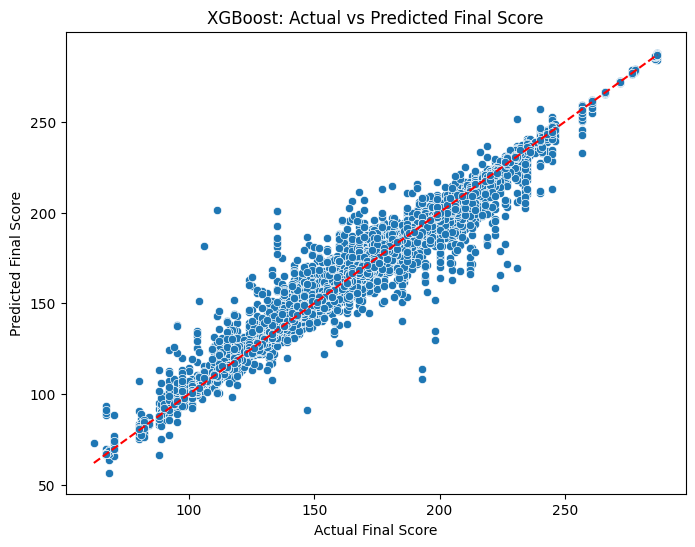

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

xgb_preds = xgb_pipeline.predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=xgb_preds)
plt.xlabel("Actual Final Score")
plt.ylabel("Predicted Final Score")
plt.title("XGBoost: Actual vs Predicted Final Score")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # diagonal line
plt.show()


### Save the Models for Deployment

In [105]:
import joblib
joblib.dump(xgb_pipeline, '/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project - 5 (IPL_Score_Prediction)/xgb_IPL_final_score_model.pkl')

['/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project - 5 (IPL_Score_Prediction)/xgb_IPL_final_score_model.pkl']

In [106]:
joblib.dump(rf_pipeline, '/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project - 5 (IPL_Score_Prediction)/rf_IPL_final_score_model.pkl')

['/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project - 5 (IPL_Score_Prediction)/rf_IPL_final_score_model.pkl']